In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [173]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [175]:
df2 = pd.read_csv('Indian Rainfall Dataset District-wise Daily Measurements.csv')
df2.head()

,"state;""district"";""month"";""1st"";""2nd"";""3rd"";""4th"";""5th"";""6th"";""7th"";""8th"";""9th"";""10th"";""11th"";""12th"";""13th"";""14th"";""15th"";""16th"";""17th"";""18th"";""19th"";""20th"";""21st"";""22nd"";""23rd"";""24th"";""25th"";""26th"";""27th"";""28th"";""29th"";""30th"";""31st"""
0,"Andaman & Nicobar;""Nicobars"";1;0.0;0.0;0.0;0.0..."
1,"Andaman & Nicobar;""North And Middle Andaman"";1..."
2,"Andaman & Nicobar;""South Andamans"";1;0.0;0.0;0..."
3,"Andhra Pradesh;""Anantapur"";1;0.379965;0.0;0.0;..."
4,"Andhra Pradesh;""Chittoor"";1;14.1449;0.857263;0..."


In [176]:
df2.columns

Index(['state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"'], dtype='object')

In [177]:
df2[['state',"district","month","1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th","11th","12th","13th","14th","15th","16th","17th","18th","19th","20th","21st","22nd","23rd","24th","25th","26th","27th","28th","29th","30th","31st"]] = df2['state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"'].str.split(';',expand = True)
df2.head()

,"state;""district"";""month"";""1st"";""2nd"";""3rd"";""4th"";""5th"";""6th"";""7th"";""8th"";""9th"";""10th"";""11th"";""12th"";""13th"";""14th"";""15th"";""16th"";""17th"";""18th"";""19th"";""20th"";""21st"";""22nd"";""23rd"";""24th"";""25th"";""26th"";""27th"";""28th"";""29th"";""30th"";""31st""",state,district,month,1st,2nd,3rd,4th,5th,6th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
0,"Andaman & Nicobar;""Nicobars"";1;0.0;0.0;0.0;0.0...",Andaman & Nicobar,"""Nicobars""",1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Andaman & Nicobar;""North And Middle Andaman"";1...",Andaman & Nicobar,"""North And Middle Andaman""",1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Andaman & Nicobar;""South Andamans"";1;0.0;0.0;0...",Andaman & Nicobar,"""South Andamans""",1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Andhra Pradesh;""Anantapur"";1;0.379965;0.0;0.0;...",Andhra Pradesh,"""Anantapur""",1,0.379965,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.205834,0.671002,0.0289937,0.0,0.0,0.0
4,"Andhra Pradesh;""Chittoor"";1;14.1449;0.857263;0...",Andhra Pradesh,"""Chittoor""",1,14.1449,0.857263,0.0,0.0,0.0,0.0,...,0.0,0.0,0.615237,0.925098,0.507623,0.424843,0.737394,0.0,0.0,0.0


In [178]:
# Dropping first column
df2.drop('state;"district";"month";"1st";"2nd";"3rd";"4th";"5th";"6th";"7th";"8th";"9th";"10th";"11th";"12th";"13th";"14th";"15th";"16th";"17th";"18th";"19th";"20th";"21st";"22nd";"23rd";"24th";"25th";"26th";"27th";"28th";"29th";"30th";"31st"',axis =1,inplace = True)

In [179]:
df2.head()

,state,district,month,1st,2nd,3rd,4th,5th,6th,7th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
0,Andaman & Nicobar,"""Nicobars""",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Andaman & Nicobar,"""North And Middle Andaman""",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Andaman & Nicobar,"""South Andamans""",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Andhra Pradesh,"""Anantapur""",1,0.379965,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.205834,0.671002,0.0289937,0.0,0.0,0.0
4,Andhra Pradesh,"""Chittoor""",1,14.1449,0.857263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.615237,0.925098,0.507623,0.424843,0.737394,0.0,0.0,0.0


In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   state     8790 non-null   object
 1   district  8790 non-null   object
 2   month     8790 non-null   object
 3   1st       8790 non-null   object
 4   2nd       8790 non-null   object
 5   3rd       8790 non-null   object
 6   4th       8790 non-null   object
 7   5th       8790 non-null   object
 8   6th       8790 non-null   object
 9   7th       8790 non-null   object
 10  8th       8790 non-null   object
 11  9th       8790 non-null   object
 12  10th      8790 non-null   object
 13  11th      8790 non-null   object
 14  12th      8790 non-null   object
 15  13th      8790 non-null   object
 16  14th      8790 non-null   object
 17  15th      8790 non-null   object
 18  16th      8790 non-null   object
 19  17th      8790 non-null   object
 20  18th      8790 non-null   object
 21  19th      8790

In [181]:
df2[['1st', '2nd', '3rd', '4th', '5th', '6th',
       '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th',
       '16th', '17th', '18th', '19th', '20th', '21st', '22nd', '23rd', '24th',
       '25th', '26th', '27th', '28th', '29th', '30th', '31st']] = df2[['1st', '2nd', '3rd', '4th', '5th', '6th',
       '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th',
       '16th', '17th', '18th', '19th', '20th', '21st', '22nd', '23rd', '24th',
       '25th', '26th', '27th', '28th', '29th', '30th', '31st']].astype('float')
df2['month'] = df2['month'].astype('float')

In [182]:
month_lookup = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
month = list()
for i in df2['month']:
    month_name = month_lookup[i]
    month.append(month_name)
df2['month'] = month

In [183]:
df2.head()

,state,district,month,1st,2nd,3rd,4th,5th,6th,7th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
0,Andaman & Nicobar,"""Nicobars""",Jan,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,Andaman & Nicobar,"""North And Middle Andaman""",Jan,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,Andaman & Nicobar,"""South Andamans""",Jan,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,Andhra Pradesh,"""Anantapur""",Jan,0.379965,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.205834,0.671002,0.028994,0.0,0.0,0.0
4,Andhra Pradesh,"""Chittoor""",Jan,14.144900,0.857263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.615237,0.925098,0.507623,0.424843,0.737394,0.0,0.0,0.0


In [184]:
district=list()
for i in df2['district']:
    district.append(i[1:len(i)-1])
df2['district']=district

In [185]:
df2.head()

,state,district,month,1st,2nd,3rd,4th,5th,6th,7th,...,22nd,23rd,24th,25th,26th,27th,28th,29th,30th,31st
0,Andaman & Nicobar,Nicobars,Jan,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,Andaman & Nicobar,North And Middle Andaman,Jan,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,Andaman & Nicobar,South Andamans,Jan,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,Andhra Pradesh,Anantapur,Jan,0.379965,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.205834,0.671002,0.028994,0.0,0.0,0.0
4,Andhra Pradesh,Chittoor,Jan,14.144900,0.857263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.615237,0.925098,0.507623,0.424843,0.737394,0.0,0.0,0.0


In [186]:
monthly_state_avg = df2.pivot_table(index = 'month', values=['1st', '2nd', '3rd', '4th', '5th', '6th',
       '7th', '8th', '9th', '10th', '11th', '12th', '13th', '14th', '15th',
       '16th', '17th', '18th', '19th', '20th', '21st', '22nd', '23rd', '24th',
       '25th', '26th', '27th', '28th', '29th', '30th', '31st'], aggfunc = np.mean, columns ='state',margins = True )
monthly_state_avg 

10th                                                        \
state Andaman & Nicobar Andhra Pradesh Arunachal Pradesh      Assam     Bihar   
month                                                                           
Apr                 0.0       0.103272          0.679301   8.832599  0.034916   
Aug                 0.0       2.196566          4.750003   9.663844  0.040240   
Dec                 0.0      18.424360          0.325321   0.001375  0.000000   
Feb                 0.0       0.000000          0.503460   0.047293  0.111961   
Jan                 0.0       0.000134          0.000000   0.000000  0.035968   
Jul                 0.0       9.547880          3.586245   7.934938  0.550642   
Jun                 0.0       0.134236         15.139075   8.515324  1.271529   
Mar                 0.0       0.000000          0.000000   0.000000  0.009942   
May                 0.0       1.710311          4.601259   6.963390  0.106786   
Nov                 0.0       0.102580          0.404150   0.003328  0.000000   
Oct                 0.0      16.430513         45.681828  10.118802  6.049105   
Sep                 0.0      19.543097          2.659388   0.804750  1.812453   
All                 0.0       5.682746          6.527502   4.407137  0.835295   

                                                                           \
state Chandigarh Chhattisgarh Dadra & Nagar Haveli Daman & Diu      Delhi   
month                                                                       
Apr     0.000000     0.000000             0.000000    0.000000  10.335909   
Aug     0.000000    39.496772            36.062600   23.513450   0.007571   
Dec     0.000000     0.817119             0.001865    0.000000   0.000000   
Feb     0.000000     1.848201             0.000000    0.000000   0.826459   
Jan    29.100000     3.738395             0.000000    0.000000   1.394995   
Jul    59.000000    15.319698            89.989600   49.736935   0.120468   
Jun     0.000000     0.427835             1.398920    0.108619  10.750118   
Mar     0.000000     0.000000             0.000000    0.000000   0.000000   
May     0.000000     0.012967             0.000000    0.000000   2.603970   
Nov     0.000000     0.000000             0.000000    0.000000   0.001436   
Oct     0.200000     1.009152             0.618315    0.004517  12.642027   
Sep     0.627000     5.853230            21.119200    2.888815   0.000000   
All     7.410583     5.710281            12.432542    6.354361   3.223580   

       ...        9th                                                        \
state  ...     Punjab  Rajasthan     Sikkim Tamil Nadu  Telangana   Tripura   
month  ...                                                                    
Apr    ...   0.000000   0.000000  20.490225   3.039318   0.000000  3.837957   
Aug    ...   0.095750   4.690351   2.031805   2.127877   9.401846  3.255551   
Dec    ...   0.000000   0.000011   0.000000   9.362564   0.021121  0.000000   
Feb    ...   0.000026   1.054642   2.640858   0.000000   0.000000  0.000000   
Jan    ...  26.857659   2.797645   1.435416   0.019276   0.000000  0.000000   
Jul    ...   0.742082   2.471877  16.581667   1.037820  40.248255  0.007080   
Jun    ...   0.000673   0.000000  24.630950   0.249360   0.547795  2.660091   
Mar    ...   0.000000   1.623228   0.000000   0.196113   0.000000  0.000000   
May    ...   0.000000   0.000000   0.230420   1.998826   0.411072  5.915067   
Nov    ...   0.240234   1.087949   0.056321   4.409008   0.002489  0.000000   
Oct    ...   1.532315  28.851858  56.618425   7.716676   2.488129  6.113222   
Sep    ...   0.002542   0.059646  16.730100   1.265161  11.598238  4.609367   
All    ...   2.455940   3.553101  11.787182   2.618500   5.393245  2.199861   

                                                        
state Uttar Pradesh Uttarakhand West Bengal        All  
month                                                   
Apr        0.000000    0.705967    1.567836   1.79767

In [187]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [188]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [189]:
df.shape

(2200, 8)

In [190]:
#Renaming columns
df.columns = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

In [191]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [192]:
crop_summary = pd.pivot_table(df,index=['Label'],aggfunc='mean')
crop_summary

,Humidity,Nitrogen,Phosphorus,Potassium,Rainfall,Temperature,pH
Label,,,,,,,
apple,92.333383,20.80,134.22,199.89,112.654779,22.630942,5.929663
banana,80.358123,100.23,82.01,50.05,104.626980,27.376798,5.983893
blackgram,65.118426,40.02,67.47,19.24,67.884151,29.973340,7.133952
chickpea,16.860439,40.09,67.79,79.92,80.058977,18.872847,7.336957
coconut,94.844272,21.98,16.93,30.59,175.686646,27.409892,5.976562
coffee,58.869846,101.20,28.74,29.94,158.066295,25.540477,6.790308
cotton,79.843474,117.77,46.24,19.56,80.398043,23.988958,6.912675
grapes,81.875228,23.18,132.53,200.11,69.611829,23.849575,6.025937
jute,79.639864,78.40,46.86,39.99,174.792798,24.958376,6.732778


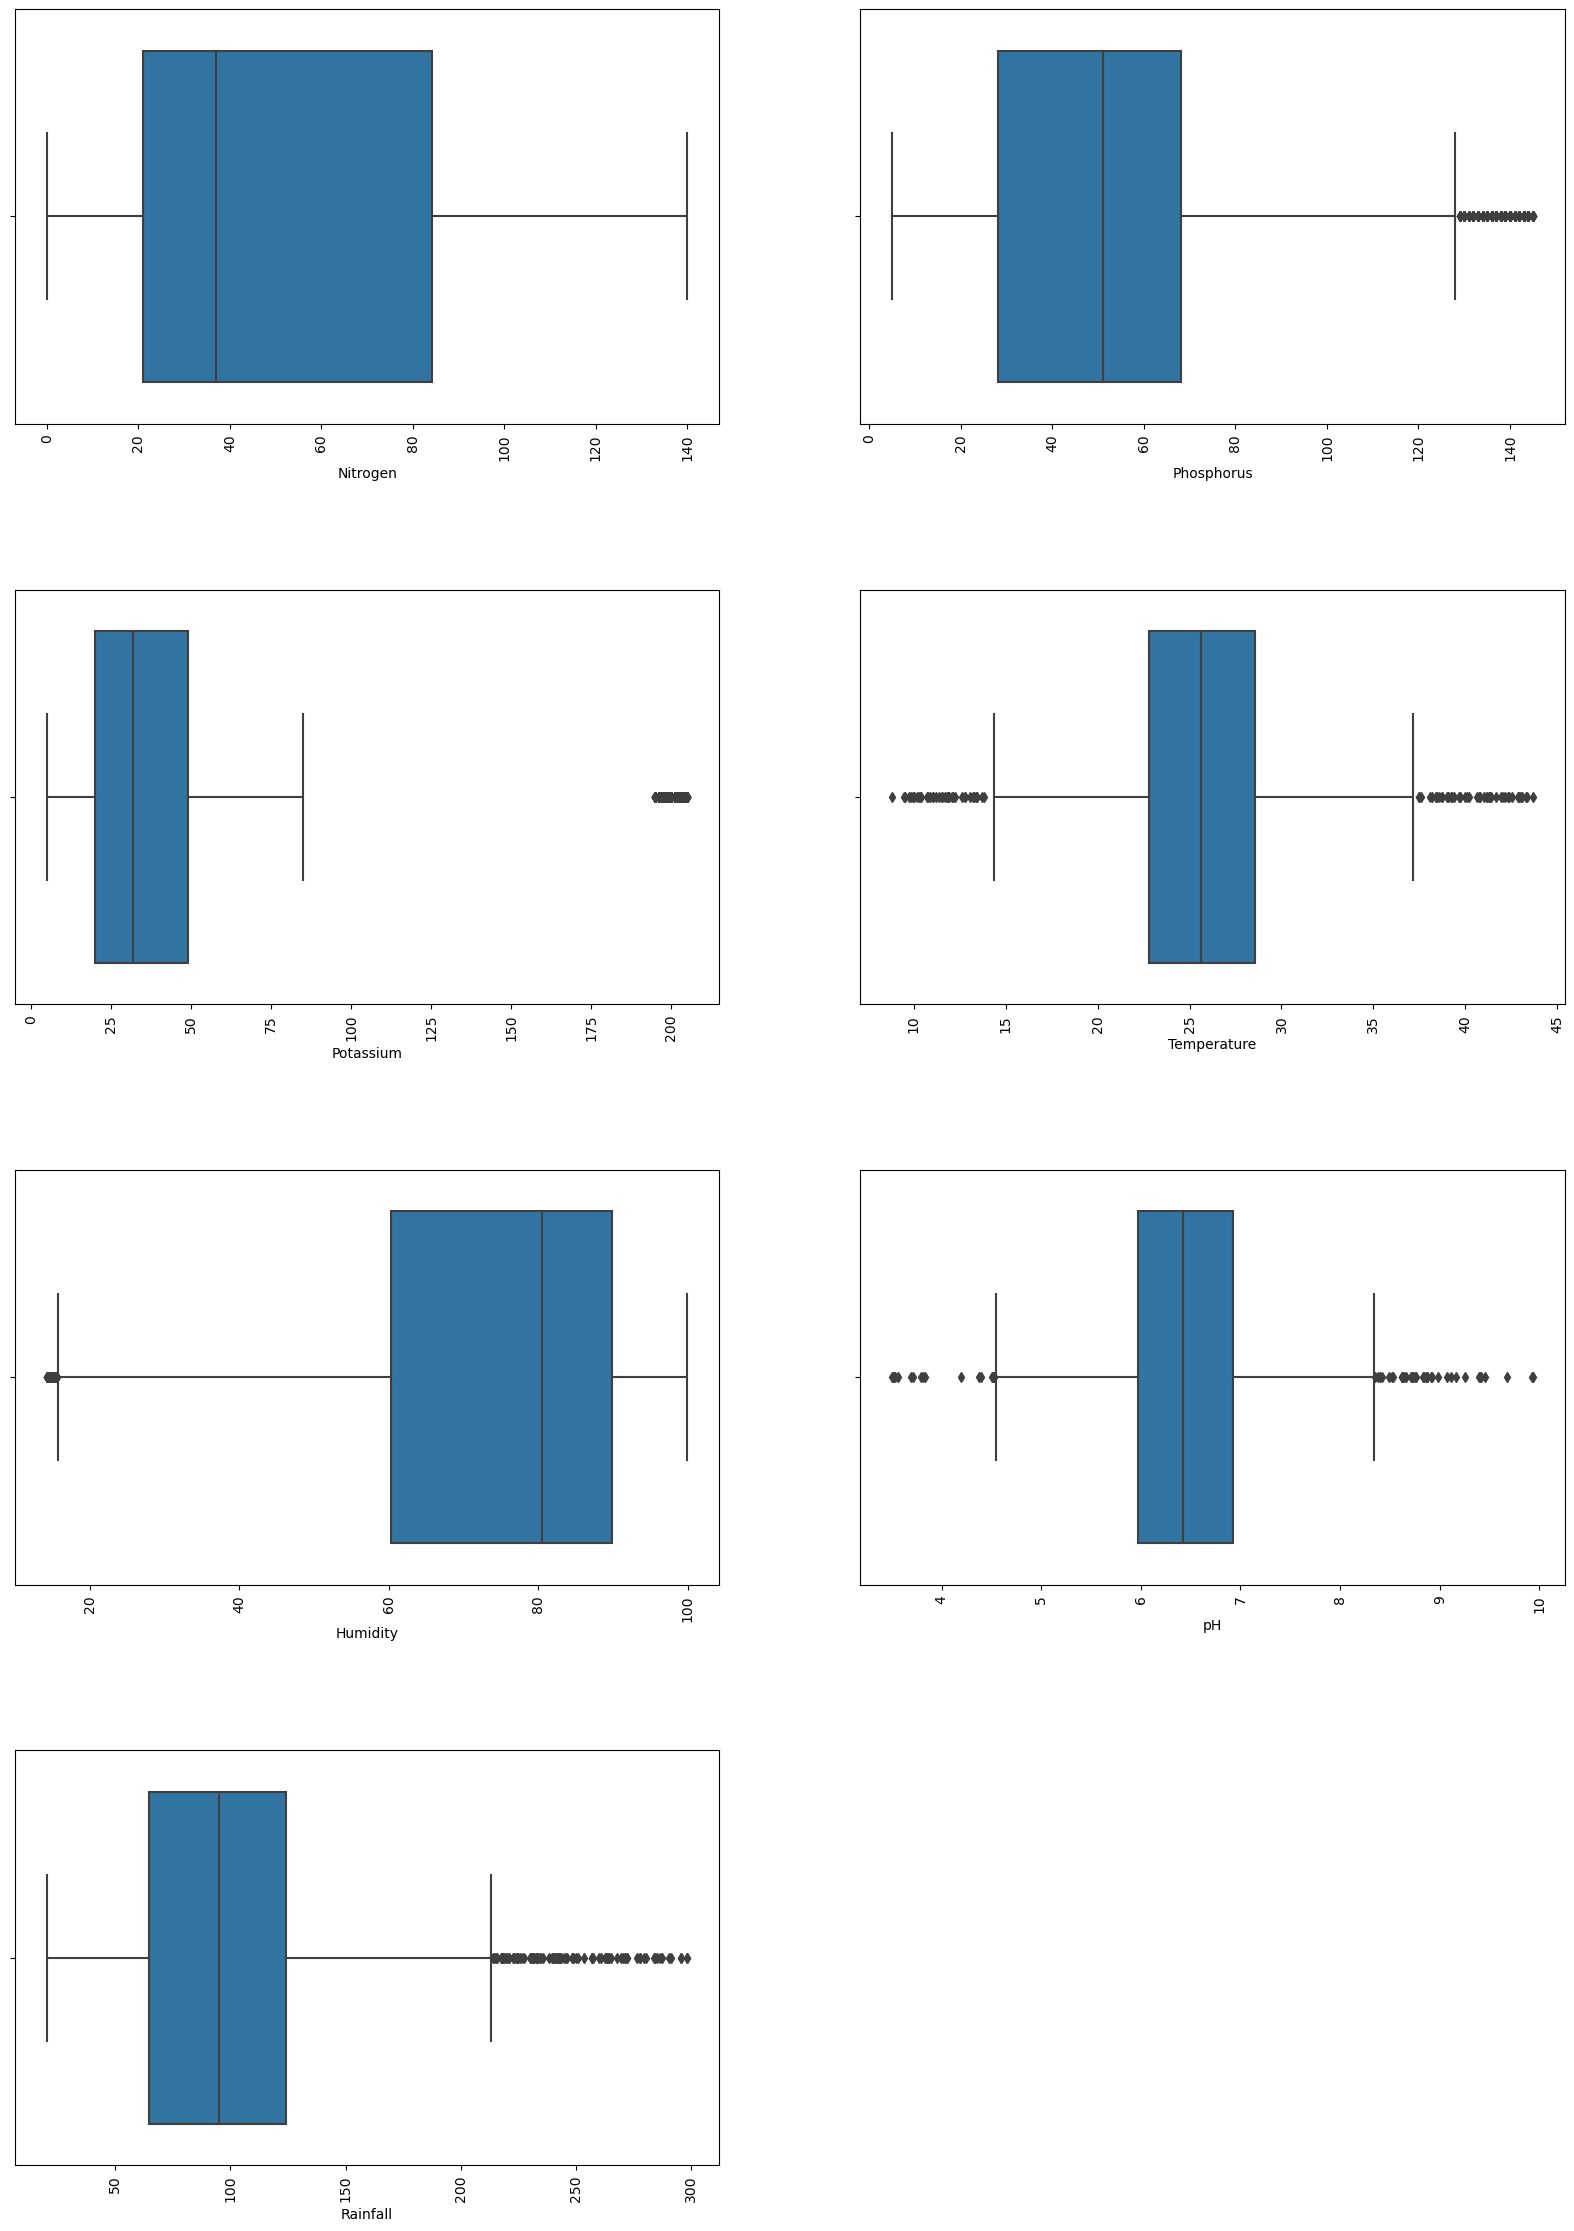

In [193]:
data1 = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']]
num_rows = 4  
num_cols = 2 
total_plots = len(data1.columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 7 * num_rows),gridspec_kw={'hspace': 0.4, 'wspace': 0.2})
axes = axes.flatten()
for i, column in enumerate(data1.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])
plt.show()


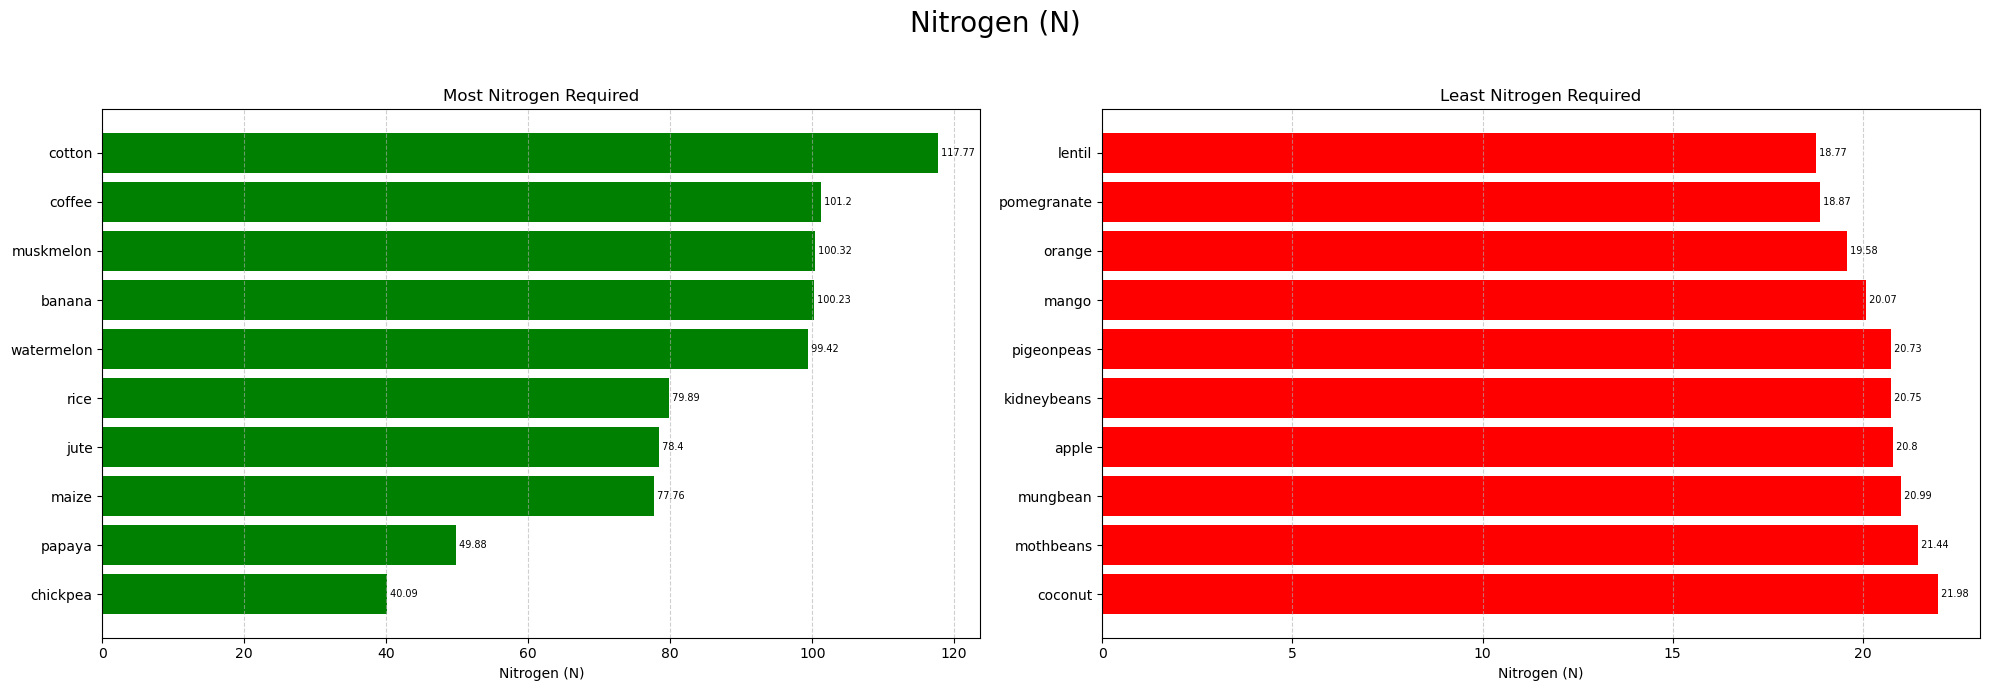

In [194]:
crop_summary_N = crop_summary.sort_values(by='Nitrogen', ascending=False)
fig, axs = plt.subplots(1, 2, figsize=(20,7))
top_10 = crop_summary_N.iloc[:10].sort_values(by='Nitrogen')
bottom_10 = crop_summary_N.iloc[-10:]
axs[0].barh(top_10.index, top_10['Nitrogen'], color='green', label='Most nitrogen required')
axs[0].set_xlabel('Nitrogen (N)')
axs[0].set_title('Most Nitrogen Required')
axs[0].grid(axis='x', linestyle='--', alpha=0.6)
axs[1].barh(bottom_10.index, bottom_10['Nitrogen'], color='red', label='Least nitrogen required')
axs[1].set_xlabel('Nitrogen (N)')
axs[1].set_title('Least Nitrogen Required')
axs[1].grid(axis='x', linestyle='--', alpha=0.6)

for i, (x, y) in enumerate(zip(top_10['Nitrogen'], top_10.index)):
    axs[0].text(x, i, f' {x}', va='center', fontsize=7, color='black')

for i, (x, y) in enumerate(zip(bottom_10['Nitrogen'], bottom_10.index)):
    axs[1].text(x, i, f' {x}', va='center', fontsize=7, color='black')

plt.suptitle('Nitrogen (N)', fontsize=20, color='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


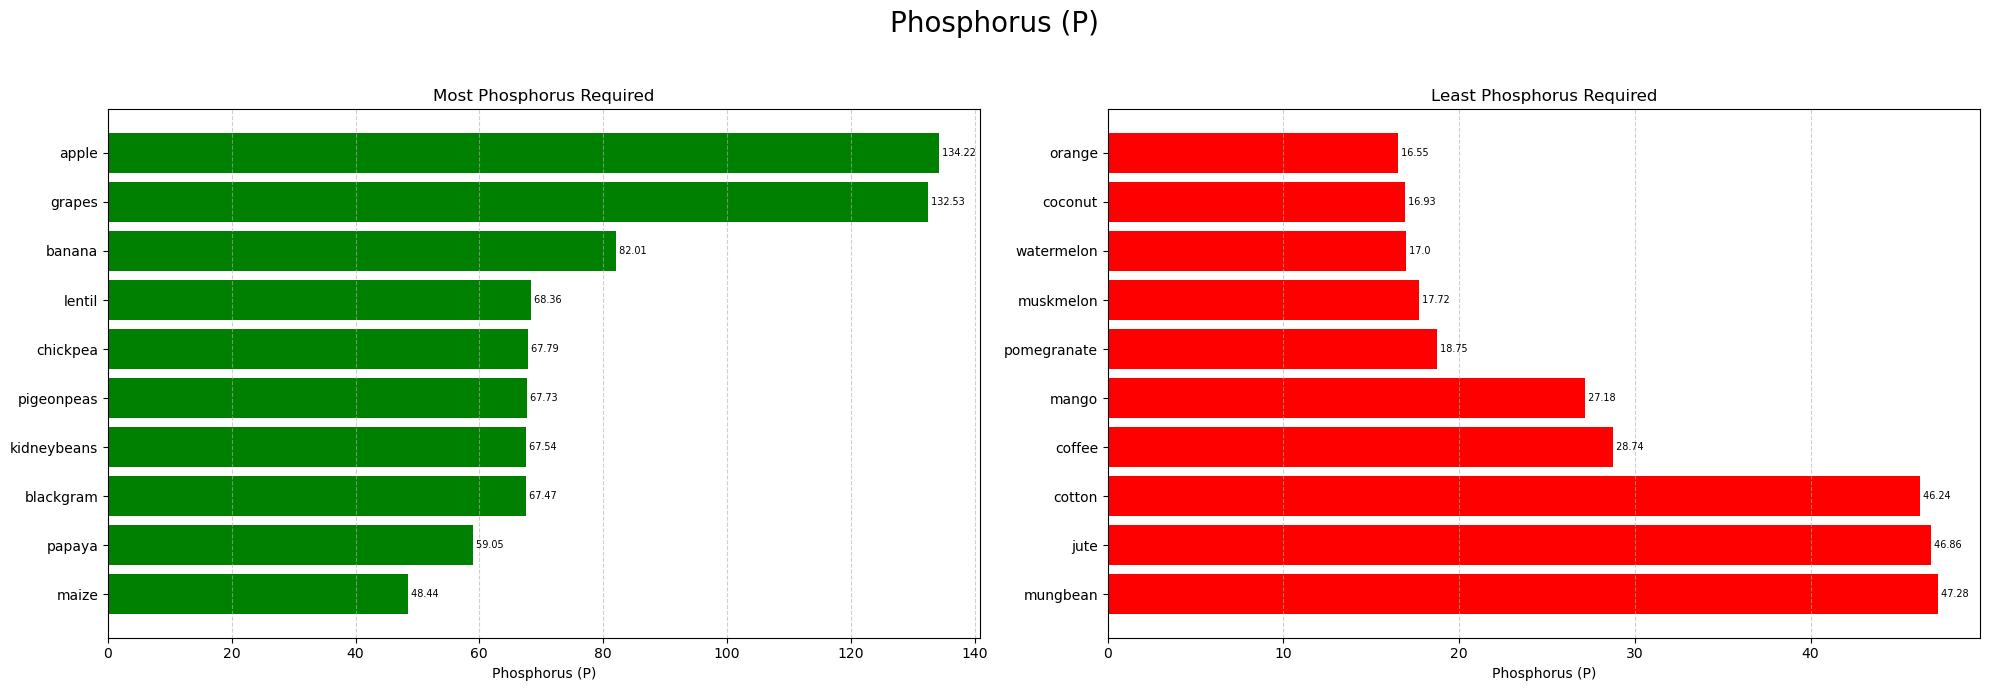

In [195]:
crop_summary_P = crop_summary.sort_values(by='Phosphorus', ascending=False)
fig, axs = plt.subplots(1, 2, figsize=(20,7))
top_10 = crop_summary_P.iloc[:10].sort_values(by='Phosphorus')
bottom_10 = crop_summary_P.iloc[-10:]
axs[0].barh(top_10.index, top_10['Phosphorus'], color='green', label='Most Phosphorus required')
axs[0].set_xlabel('Phosphorus (P)')
axs[0].set_title('Most Phosphorus Required')
axs[0].grid(axis='x', linestyle='--', alpha=0.6)
axs[1].barh(bottom_10.index, bottom_10['Phosphorus'], color='red', label='Least Phosphorus required')
axs[1].set_xlabel('Phosphorus (P)')
axs[1].set_title('Least Phosphorus Required')
axs[1].grid(axis='x', linestyle='--', alpha=0.6)

for i, (x, y) in enumerate(zip(top_10['Phosphorus'], top_10.index)):
    axs[0].text(x, i, f' {x}', va='center', fontsize=7, color='black')

for i, (x, y) in enumerate(zip(bottom_10['Phosphorus'], bottom_10.index)):
    axs[1].text(x, i, f' {x}', va='center', fontsize=7, color='black')

plt.suptitle('Phosphorus (P)', fontsize=20, color='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


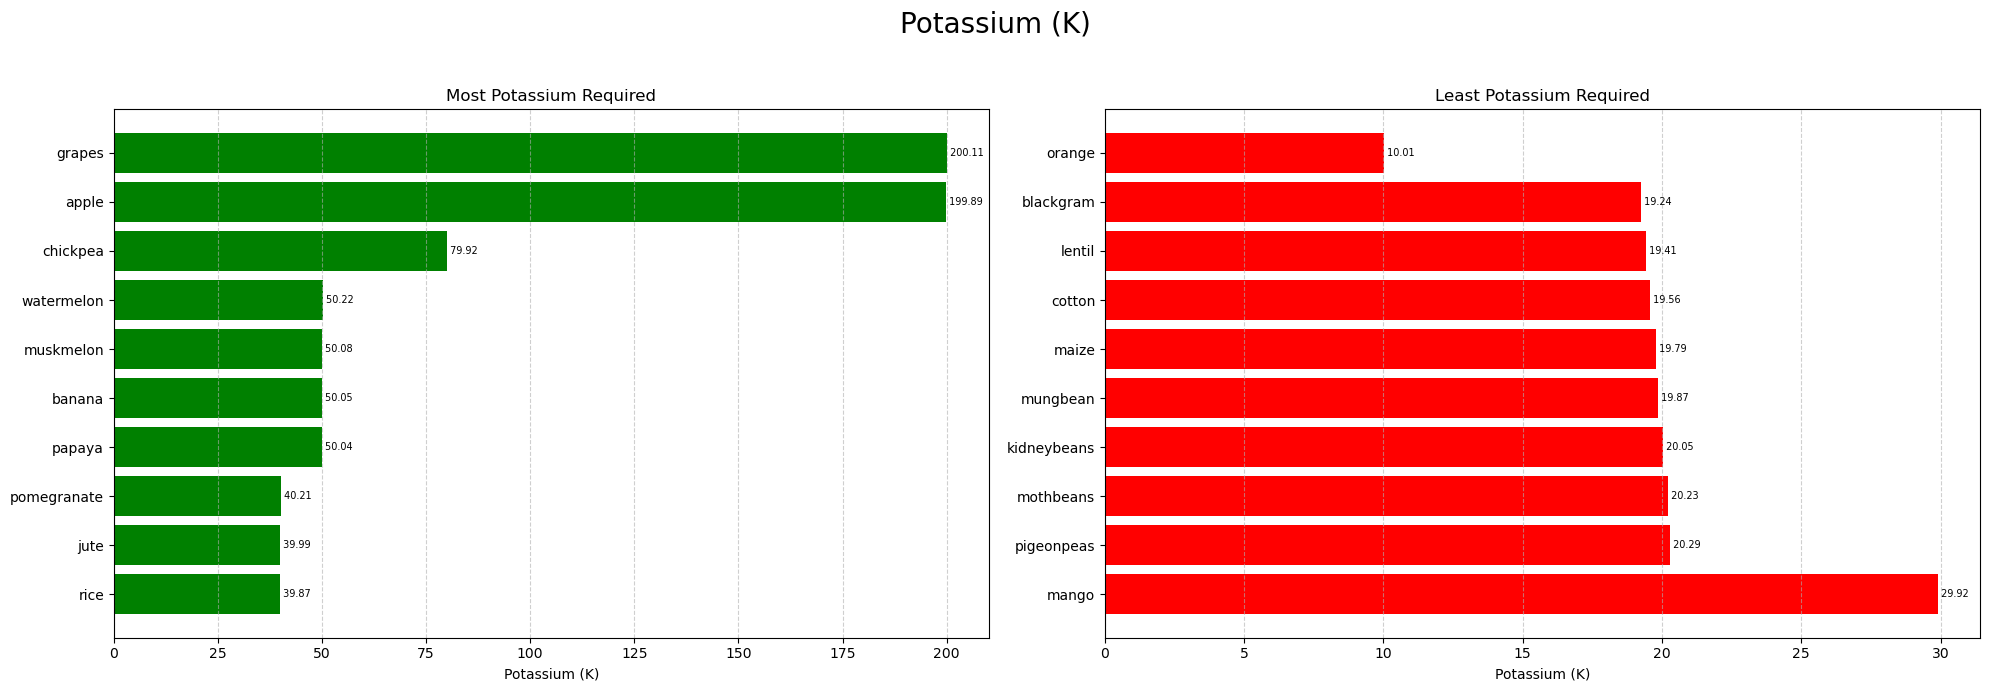

In [196]:
crop_summary_K = crop_summary.sort_values(by='Potassium', ascending=False)
fig, axs = plt.subplots(1, 2, figsize=(20,7))
top_10 = crop_summary_K.iloc[:10].sort_values(by='Potassium')
bottom_10 = crop_summary_K.iloc[-10:]
axs[0].barh(top_10.index, top_10['Potassium'], color='green', label='Most Potassium required')
axs[0].set_xlabel('Potassium (K)')
axs[0].set_title('Most Potassium Required')
axs[0].grid(axis='x', linestyle='--', alpha=0.6)
axs[1].barh(bottom_10.index, bottom_10['Potassium'], color='red', label='Least Potassium required')
axs[1].set_xlabel('Potassium (K)')
axs[1].set_title('Least Potassium Required')
axs[1].grid(axis='x', linestyle='--', alpha=0.6)

for i, (x, y) in enumerate(zip(top_10['Potassium'], top_10.index)):
    axs[0].text(x, i, f' {x}', va='center', fontsize=7, color='black')

for i, (x, y) in enumerate(zip(bottom_10['Potassium'], bottom_10.index)):
    axs[1].text(x, i, f' {x}', va='center', fontsize=7, color='black')

plt.suptitle('Potassium (K)', fontsize=20, color='black')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


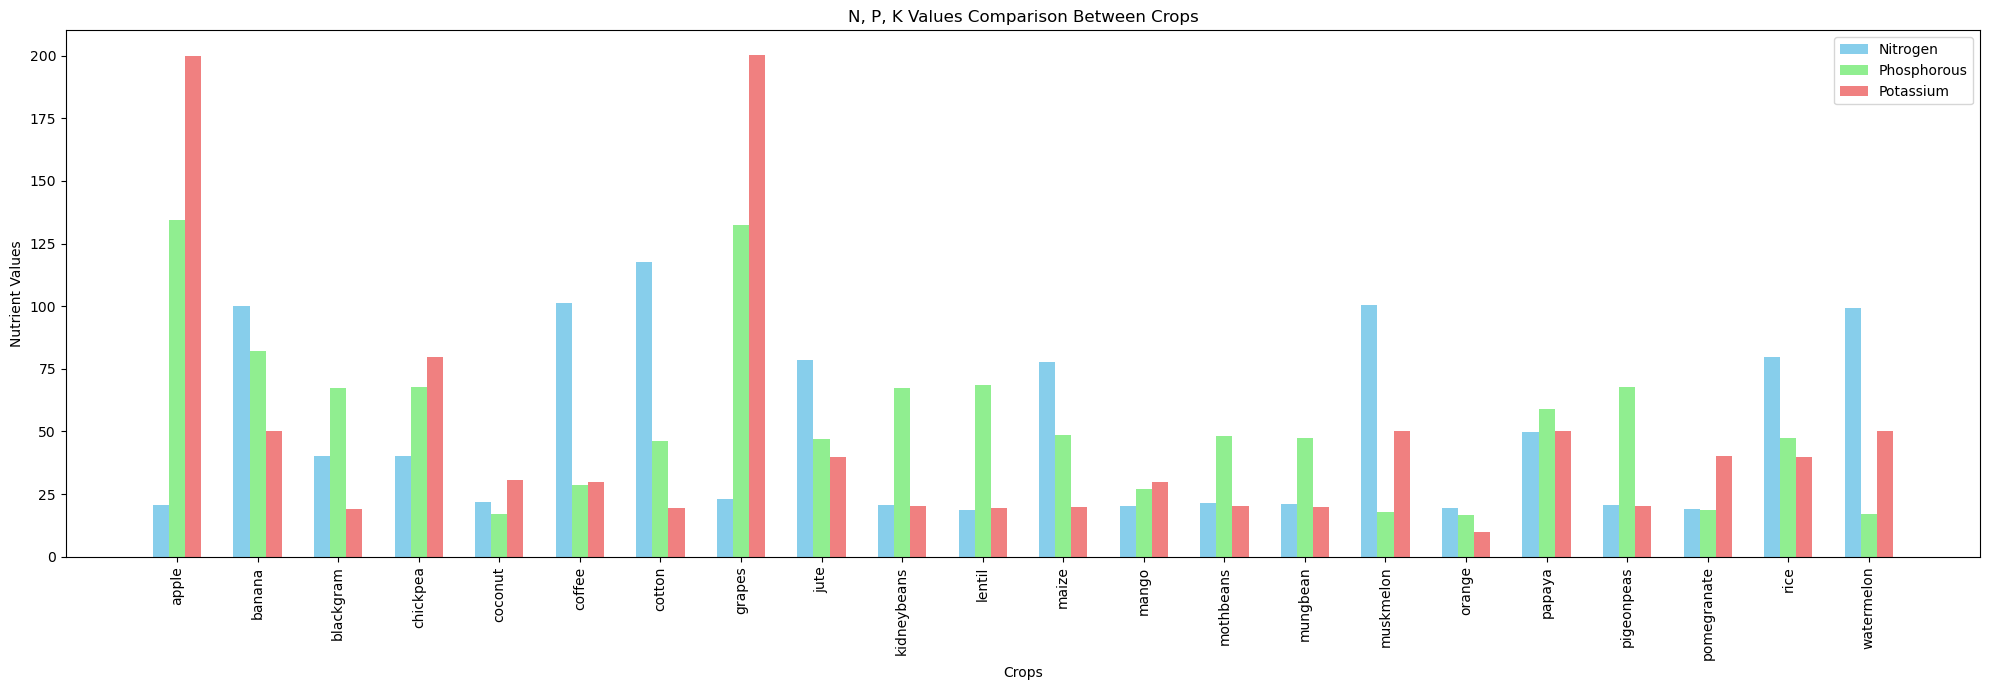

In [197]:
colors = ['skyblue', 'lightgreen', 'lightcoral']
nutrients = ['Nitrogen', 'Phosphorous', 'Potassium']
fig, ax = plt.subplots(figsize=(20, 7))
bar_width = 0.2
index = np.arange(len(crop_summary.index))
for i, nutrient in enumerate(['Nitrogen', 'Phosphorus', 'Potassium']):
    ax.bar(
        index + i * bar_width,
        crop_summary[nutrient],
        bar_width,
        label=nutrients[i],
        color=colors[i],
    )

ax.set_xlabel('Crops')
ax.set_ylabel('Nutrient Values')
ax.set_title('N, P, K Values Comparison Between Crops')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(crop_summary.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


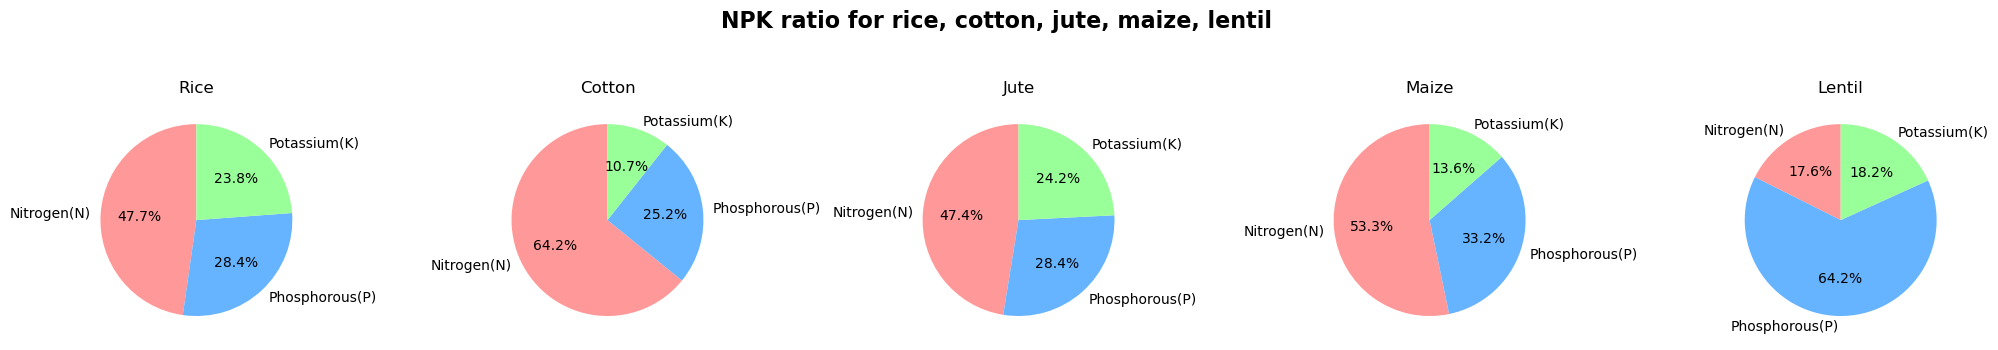

In [205]:
labels = ['Nitrogen(N)', 'Phosphorous(P)', 'Potassium(K)']
crop_names = ['Rice', 'Cotton', 'Jute', 'Maize', 'Lentil']

rice_npk = crop_summary[crop_summary.index=='rice']
cotton_npk = crop_summary[crop_summary.index=='cotton']
jute_npk = crop_summary[crop_summary.index=='jute']
maize_npk = crop_summary[crop_summary.index=='maize']
lentil_npk = crop_summary[crop_summary.index=='lentil']

crop_data = {
    'Rice': [rice_npk['Nitrogen'][0], rice_npk['Phosphorus'][0], rice_npk['Potassium'][0]],
    'Cotton': [cotton_npk['Nitrogen'][0], cotton_npk['Phosphorus'][0], cotton_npk['Potassium'][0]],
    'Jute': [jute_npk['Nitrogen'][0], jute_npk['Phosphorus'][0], jute_npk['Potassium'][0]],
    'Maize': [maize_npk['Nitrogen'][0], maize_npk['Phosphorus'][0], maize_npk['Potassium'][0]],
    'Lentil': [lentil_npk['Nitrogen'][0], lentil_npk['Phosphorus'][0], lentil_npk['Potassium'][0]]
}

fig, axs = plt.subplots(1, 5, figsize=(20, 4))  
colors = ['#ff9999', '#66b3ff', '#99ff99']

for i, crop_name in enumerate(crop_names):
    values = crop_data[crop_name]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(crop_name)

fig.suptitle("NPK ratio for rice, cotton, jute, maize, lentil", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


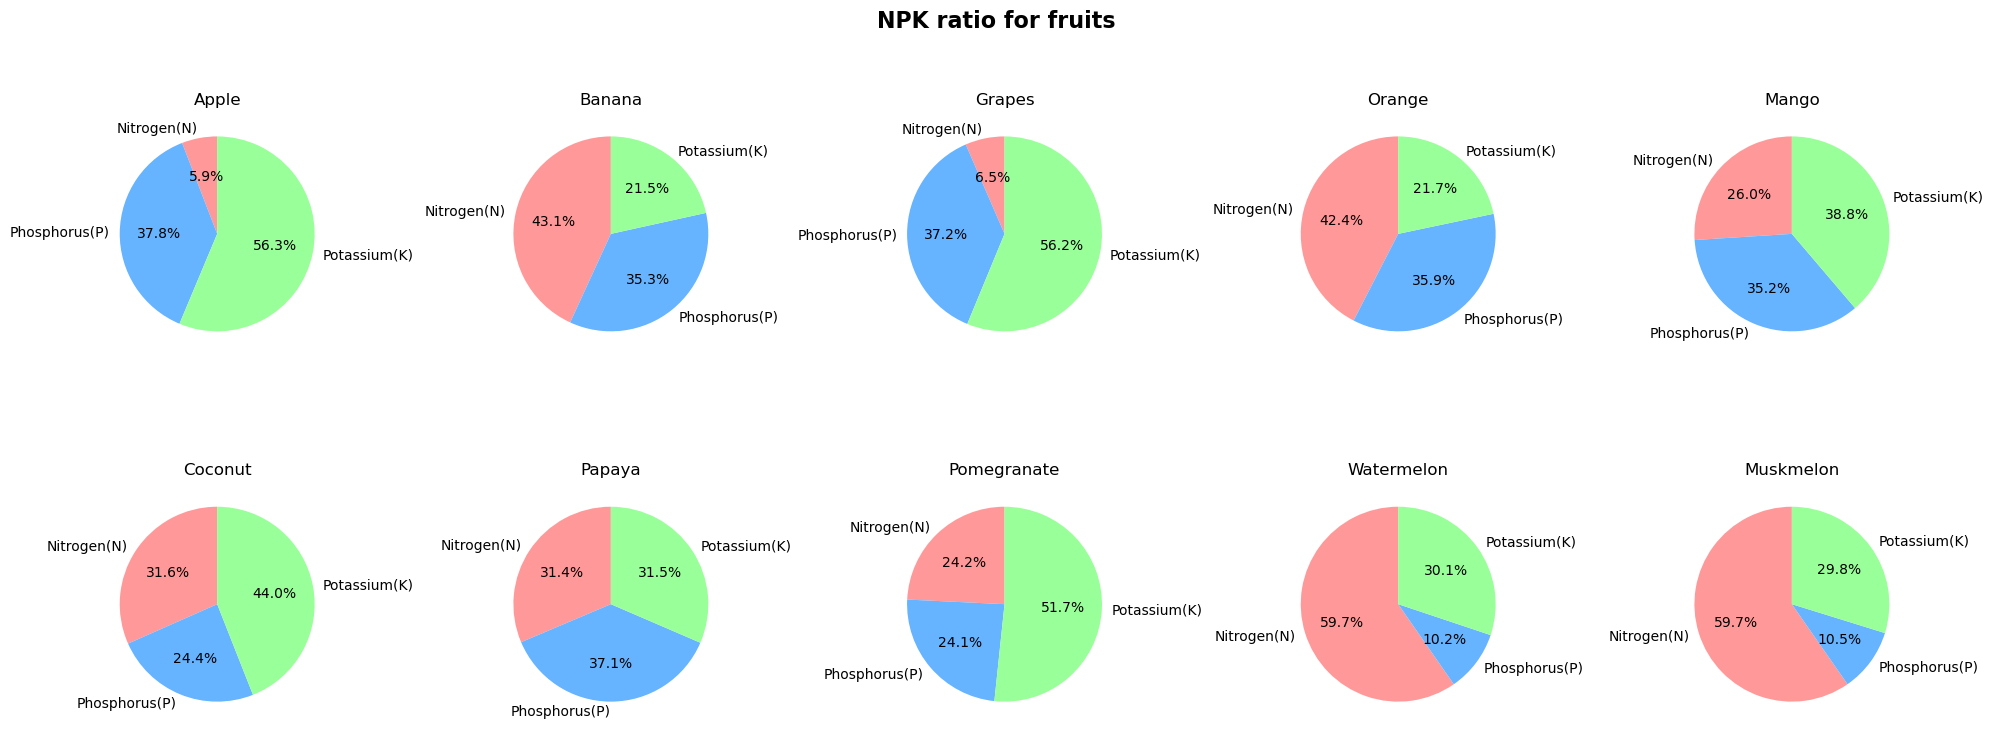

In [204]:
labels = ['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)']
crop_names = ['Apple', 'Banana', 'Grapes', 'Orange', 'Mango', 'Coconut', 'Papaya', 'Pomegranate', 'Watermelon', 'Muskmelon']

apple_npk = crop_summary[crop_summary.index=='apple']
banana_npk = crop_summary[crop_summary.index=='banana']
grapes_npk = crop_summary[crop_summary.index=='grapes']
orange_npk = crop_summary[crop_summary.index=='orange']
mango_npk = crop_summary[crop_summary.index=='mango']
coconut_npk = crop_summary[crop_summary.index=='coconut']
papaya_npk = crop_summary[crop_summary.index=='papaya']
pomegranate_npk = crop_summary[crop_summary.index=='pomegranate']
watermelon_npk = crop_summary[crop_summary.index=='watermelon']
muskmelon_npk = crop_summary[crop_summary.index=='muskmelon']

crop_summary_data = {
    'Apple': [apple_npk['Nitrogen'][0], apple_npk['Phosphorus'][0], apple_npk['Potassium'][0]],
    'Banana': [banana_npk['Nitrogen'][0], banana_npk['Phosphorus'][0], banana_npk['Potassium'][0]],
    'Grapes': [grapes_npk['Nitrogen'][0], grapes_npk['Phosphorus'][0], grapes_npk['Potassium'][0]],
    'Orange': [orange_npk['Nitrogen'][0], orange_npk['Phosphorus'][0], orange_npk['Potassium'][0]],
    'Mango': [mango_npk['Nitrogen'][0], mango_npk['Phosphorus'][0], mango_npk['Potassium'][0]],
    'Coconut': [coconut_npk['Nitrogen'][0], coconut_npk['Phosphorus'][0], coconut_npk['Potassium'][0]],
    'Papaya': [papaya_npk['Nitrogen'][0], papaya_npk['Phosphorus'][0], papaya_npk['Potassium'][0]],
    'Pomegranate': [pomegranate_npk['Nitrogen'][0], pomegranate_npk['Phosphorus'][0], pomegranate_npk['Potassium'][0]],
    'Watermelon': [watermelon_npk['Nitrogen'][0], watermelon_npk['Phosphorus'][0], watermelon_npk['Potassium'][0]],
    'Muskmelon': [muskmelon_npk['Nitrogen'][0], muskmelon_npk['Phosphorus'][0], muskmelon_npk['Potassium'][0]],
}

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99']
for i, crop_name in enumerate(crop_names):
    row = i // 5
    col = i % 5
    values = crop_summary_data[crop_name]
    axs[row, col].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[row, col].set_title(crop_name)

fig.suptitle("NPK ratio for fruits", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [221]:
crop_scatter = df[(df['Label'] == 'rice') |
                  (df['Label'] == 'jute') |
                  (df['Label'] == 'cotton') |
                  (df['Label'] == 'maize') |
                  (df['Label'] == 'lentil')]

fig = px.scatter(
    crop_scatter,
    x="Temperature",
    y="Humidity",
    color="Label",
    symbol="Label",
    title="Scatter Plot of Crop Data",
    labels={"Temperature": "Temperature (°C)", "Humidity": "Humidity (%)"},
    color_discrete_map={"rice": "red", "jute": "blue", "cotton": "green", "maize": "purple", "lentil": "orange"},
    symbol_map={"rice": "circle", "jute": "square", "cotton": "diamond", "maize": "cross", "lentil": "x"}
)

fig.update_layout(
    plot_bgcolor='white', 
    xaxis=dict(showgrid=True, gridcolor='lightgray'),  
    yaxis=dict(showgrid=True, gridcolor='lightgray'),  
    legend_title_text='Crop Type',  
    showlegend=True, 
    legend_traceorder='normal'  
)

fig.show()


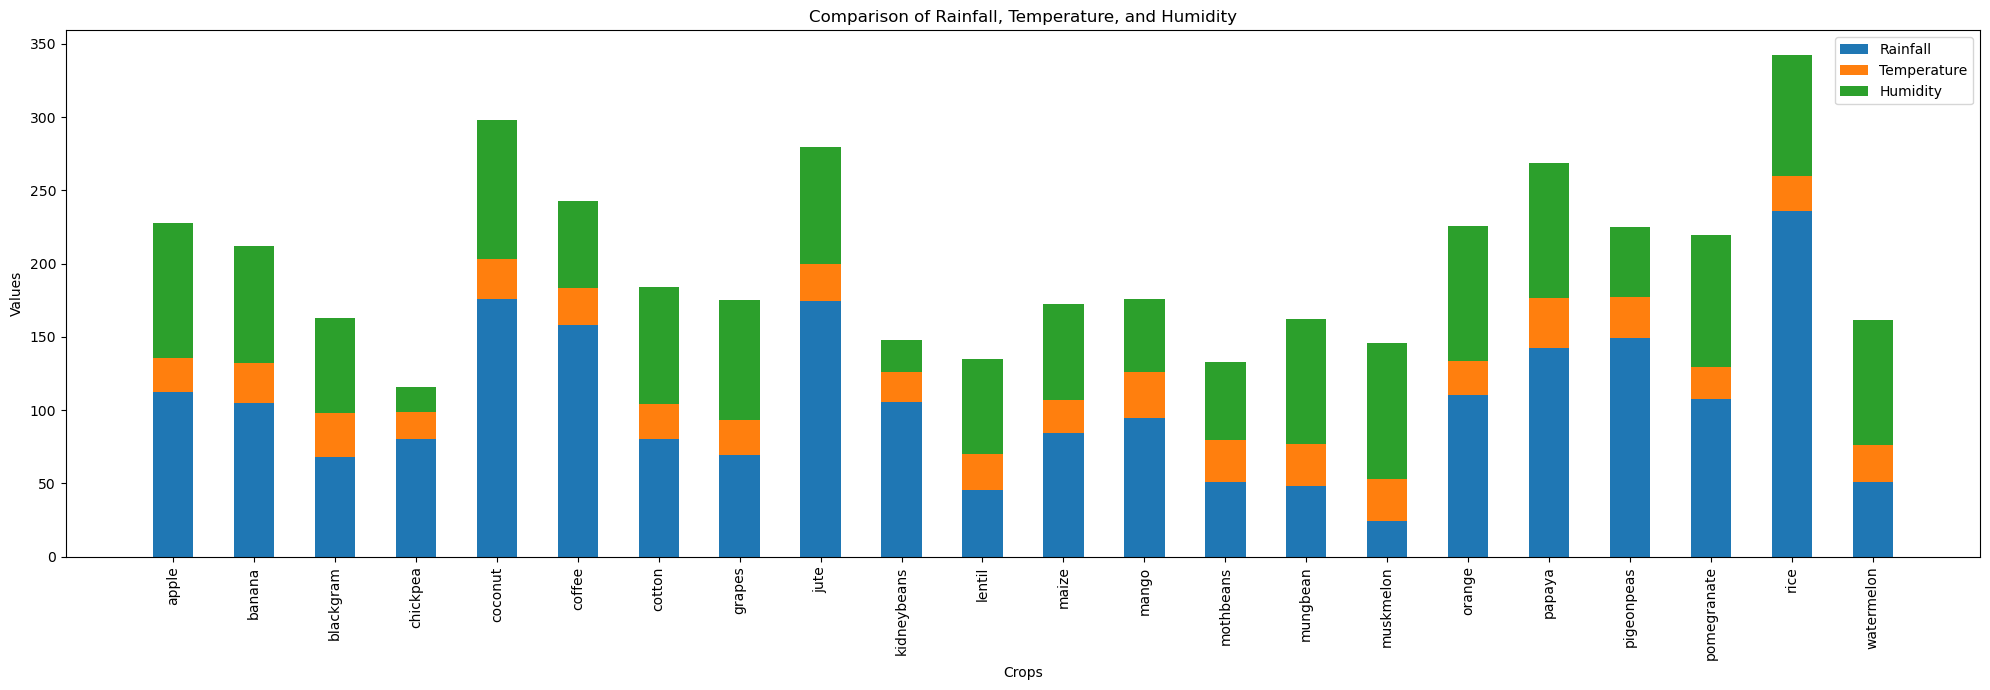

In [242]:
crops = crop_summary.index
rainfall = crop_summary['Rainfall']
temperature = crop_summary['Temperature']
humidity = crop_summary['Humidity']
x = np.arange(len(crops))
bar_width = 0.50
fig, ax = plt.subplots(figsize=(20, 7))

bar_combined = ax.bar(x, rainfall, width=bar_width, label='Rainfall', align='center')
ax.bar(x, temperature, width=bar_width, bottom=rainfall, label='Temperature', align='center')
ax.bar(x, humidity, width=bar_width, bottom=rainfall + temperature, label='Humidity', align='center')

ax.set_xticks(x)
ax.set_xticklabels(crops, rotation=90, fontsize=10)
ax.set_title("Comparison of Rainfall, Temperature, and Humidity")
ax.set_xlabel("Crops")
ax.set_ylabel("Values")
ax.grid(False)
ax.legend()
plt.tight_layout()
plt.show()


In [229]:
df.corr()

C:\Users\ankur\AppData\Local\Temp\ipykernel_19112\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


C:\Users\ankur\AppData\Local\Temp\ipykernel_19112\2577504949.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



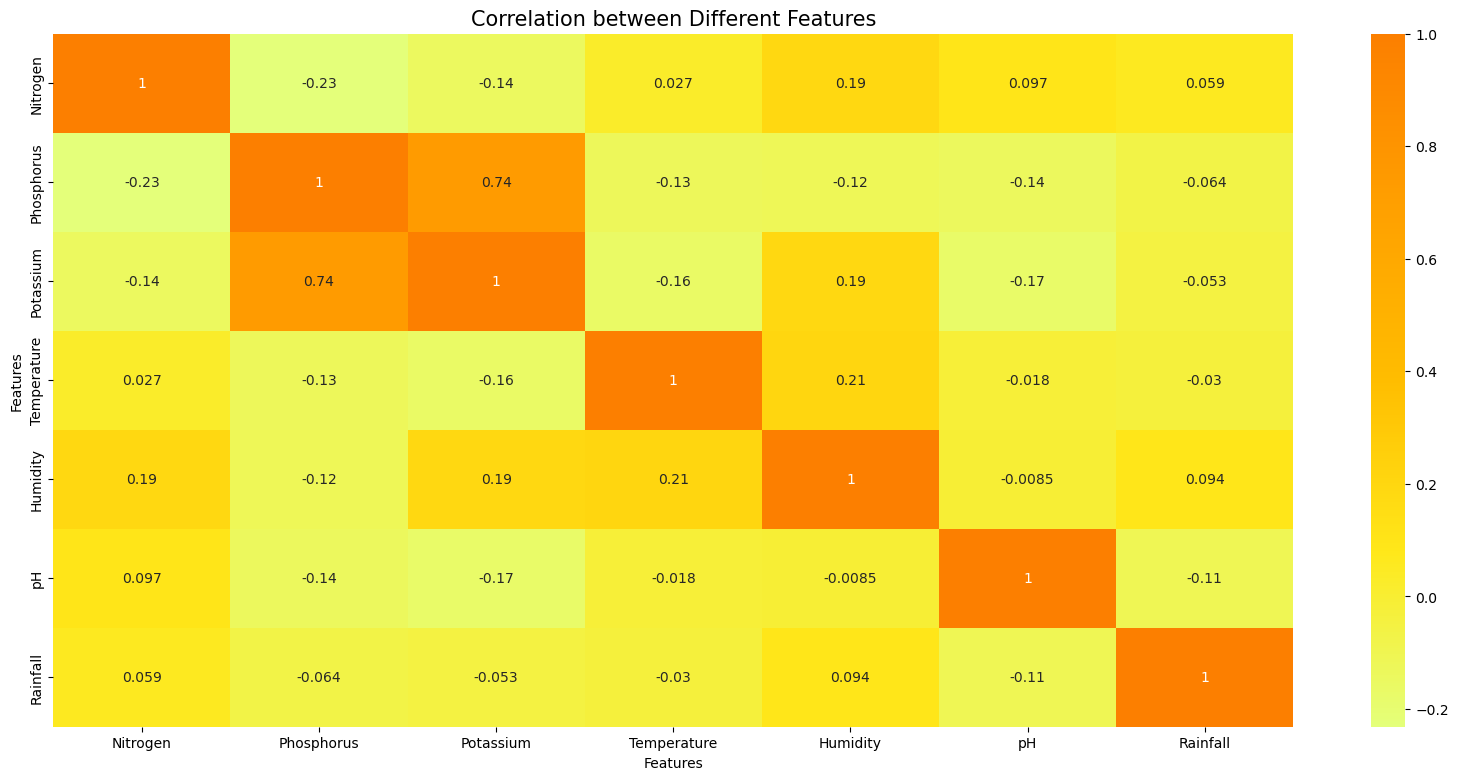

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Wistia', ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Features')
plt.title('Correlation between Different Features', fontsize=15, color='black')
plt.show()
